#### Import libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
#from sklearn.externals import StringIO  
import pydot

ModuleNotFoundError: No module named 'graphviz'

In [141]:
import warnings
warnings.filterwarnings("ignore")

#### Import dataset

In [142]:
eq=pd.read_csv('./Equifax_Clean.csv')

In [143]:
len(eq)

106297

In [144]:
eq.head()

,consumer_id,zip_code,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,...,narrcode_2,narrcode_3,narrcode_4,ecoa,rate_status,scheduled_payment_amount,actual_payment_amount,payment_frequency,account_type,activity_designator
0,8418583,30577.0,1.0,165.0,134.0,10.0,40.0,1.0,36.0,0.0,...,0.0,0.0,0.0,I,1,0.0,0.0,M,18,N
1,5197153,30120.0,3.0,250.0,157.0,13.0,32.0,0.0,30.0,1.0,...,0.0,0.0,0.0,I,1,0.0,0.0,M,18,N
2,13467941,90222.0,3.0,329.0,65.0,22.0,48.0,0.0,23.0,12.0,...,0.0,0.0,0.0,I,2,94.0,100.0,M,18,C
3,22839444,91786.0,2.0,201.0,201.0,3.0,19.0,2.0,19.0,0.0,...,0.0,0.0,0.0,J,1,132.0,132.0,M,12,N
4,10387251,94122.0,1.0,221.0,152.0,8.0,32.0,2.0,32.0,0.0,...,0.0,0.0,0.0,I,1,47.0,60.0,M,89,N


In [145]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106297 entries, 0 to 106296
Data columns (total 50 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   consumer_id                                                             106297 non-null  int64  
 1   zip_code                                                                106297 non-null  float64
 2   inquiries_12_months                                                     106297 non-null  float64
 3   age_oldest_account                                                      106297 non-null  float64
 4   age_oldest_mortgage_account                                             106297 non-null  float64
 5   age_newest_account                                                      106297 non-null  float64
 6   number_of_accounts                                                  

In [146]:
eq.describe()

,consumer_id,zip_code,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,...,high_credit,monthly_payment,transferred_sold_flag,new_origination_flag,narrcode_1,narrcode_2,narrcode_3,narrcode_4,scheduled_payment_amount,actual_payment_amount
count,1.062970e+05,106297.000000,106297.000000,106297.000000,106297.000000,106297.000000,106297.000000,106297.000000,106297.000000,106297.000000,...,1.062970e+05,106297.000000,106297.000000,106297.000000,106297.000000,106297.000000,106297.000000,106297.0,106297.000000,106297.000000
mean,1.207805e+07,50152.042692,23.119655,219.488951,3798.780191,15.786880,21.006943,1.331656,18.974712,0.643179,...,1.931824e+04,177.170353,0.007517,0.011797,26.225924,5.665108,0.301514,0.0,162.155047,393.332380
std,6.986273e+06,29924.361880,40.072369,129.336279,4772.557966,48.240886,11.497197,1.811666,11.326399,1.989452,...,6.044231e+04,928.020320,0.086373,0.107973,57.760760,31.880632,8.909701,0.0,802.778877,5557.780829
min,1.207000e+03,610.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,6.003804e+06,24153.000000,1.000000,131.000000,106.000000,4.000000,12.000000,0.000000,10.000000,0.000000,...,1.284000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.191648e+07,47336.000000,2.000000,198.000000,168.000000,9.000000,20.000000,1.000000,17.000000,0.000000,...,4.409000e+03,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,15.000000,40.000000
75%,1.799770e+07,78102.000000,7.000000,291.000000,9998.000000,20.000000,28.000000,2.000000,26.000000,0.000000,...,1.230900e+04,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,200.000000
max,2.448117e+07,99929.000000,99.000000,9997.000000,9998.000000,9997.000000,97.000000,97.000000,97.000000,97.000000,...,2.200000e+06,200070.000000,1.000000,1.000000,298.000000,298.000000,280.000000,0.0,200675.000000,575724.000000


In [147]:
eq.columns

Index(['consumer_id', 'zip_code', 'inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'vantage_score_3', 'state', 'trade_id',
       'origination_portfolio_type', 'origination_product_category',
       'origination_vantage_score3', 'product_category', 'pim_score',
       'consumer_age', 'mortgage_indicator', 'deceased_consumer', 'terms',
       'status_category', 'balance', 'high_credit',

In [148]:
eq.dtypes

consumer_id                                                                 int64
zip_code                                                                  float64
inquiries_12_months                                                       float64
age_oldest_account                                                        float64
age_oldest_mortgage_account                                               float64
age_newest_account                                                        float64
number_of_accounts                                                        float64
number_accounts_opened_within_12_months                                   float64
number_accounts_always_satisfactory                                       float64
number_accounts_major_derogatory                                          float64
number_revolving_accts_greater_than_or_equal_to_50_percent_utilization    float64
bankcard_accts_over_75_percent_utilization                                float64
number_accounts_

#### Create 3 different dataframes for customer financial health, risk factors and categorical info

In [149]:
eq_cust_fin=eq[['inquiries_12_months','age_oldest_account','age_oldest_mortgage_account','age_newest_account',
               'number_of_accounts', 'number_accounts_opened_within_12_months','number_accounts_always_satisfactory',
               'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization','bankcard_accts_over_75_percent_utilization',
               'number_3rd_party_collection_accts','total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
               'number_open_mortgage_accounts','origination_portfolio_type','origination_product_category',
               'pim_score', 'balance', 'high_credit', 'monthly_payment','scheduled_payment_amount','actual_payment_amount']]

In [150]:
eq_cust_rsk=eq[['number_accounts_major_derogatory','number_accounts_past_due','total_past_due_amount','bankruptcy_flag',
               'foreclosure_flag','mortgage_indicator', 'deceased_consumer','transferred_sold_flag', 'new_origination_flag']]

In [151]:
eq_cust_cat=eq[['consumer_id','zip_code','state','trade_id','product_category','portfolio_type','ecoa','rate_status',
               'payment_frequency', 'account_type', 'activity_designator','consumer_age','terms','status_category']]

#### Check if any variables are highly correlated and clean financial dataframe

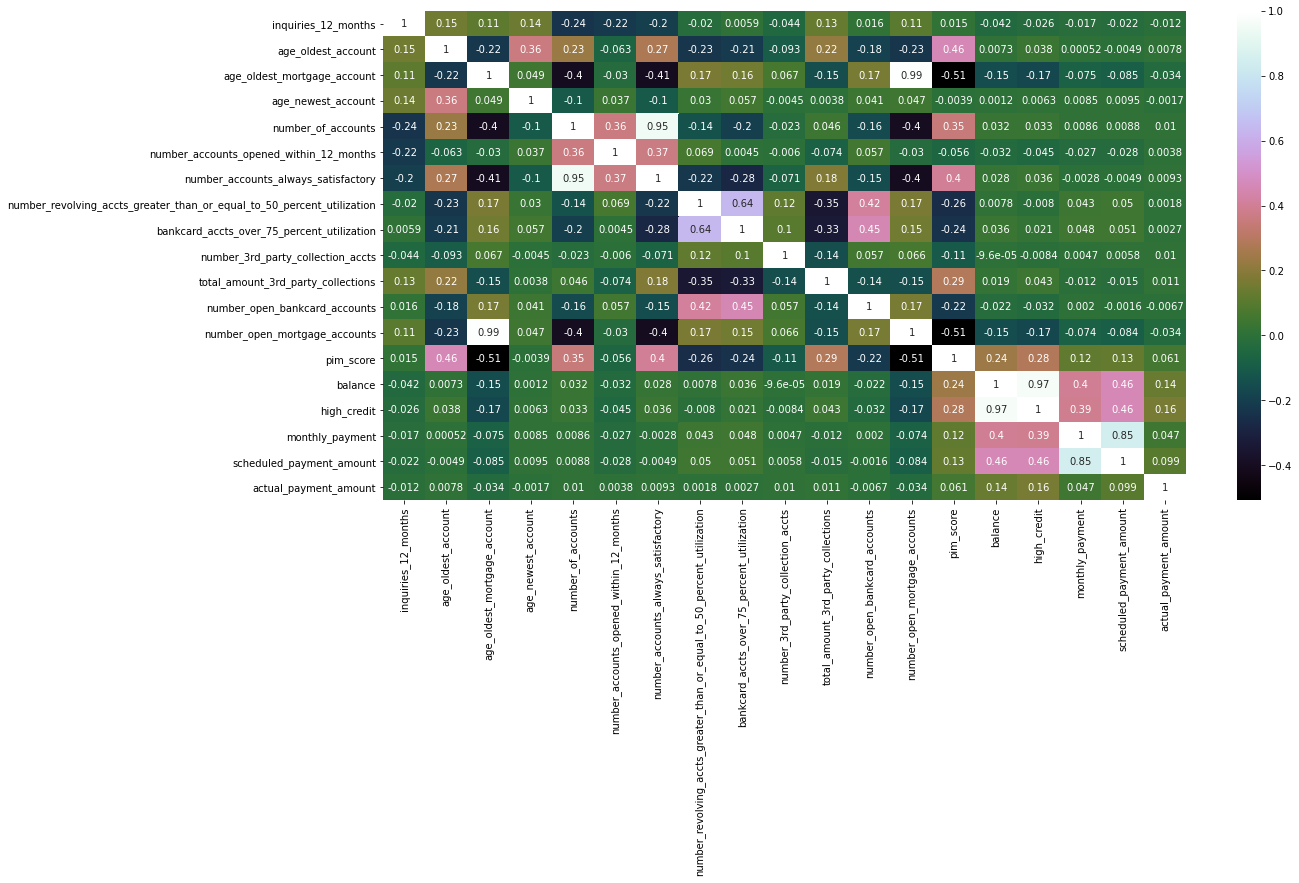

In [152]:
plt.figure(figsize=(18,9))
corr = eq_cust_fin.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

In [153]:
eq_cust_fin['accounts_non_satisfactory']=eq_cust_fin.number_of_accounts-eq_cust_fin.number_accounts_always_satisfactory
eq_cust_fin['credit']=eq_cust_fin.balance+eq_cust_fin.high_credit

In [154]:
eq_cust_fin=eq_cust_fin.drop(columns=['balance','high_credit','scheduled_payment_amount','age_oldest_mortgage_account','number_of_accounts'])

#### Check if any variables are highly correlated or non correlated and clean the risk dataframe

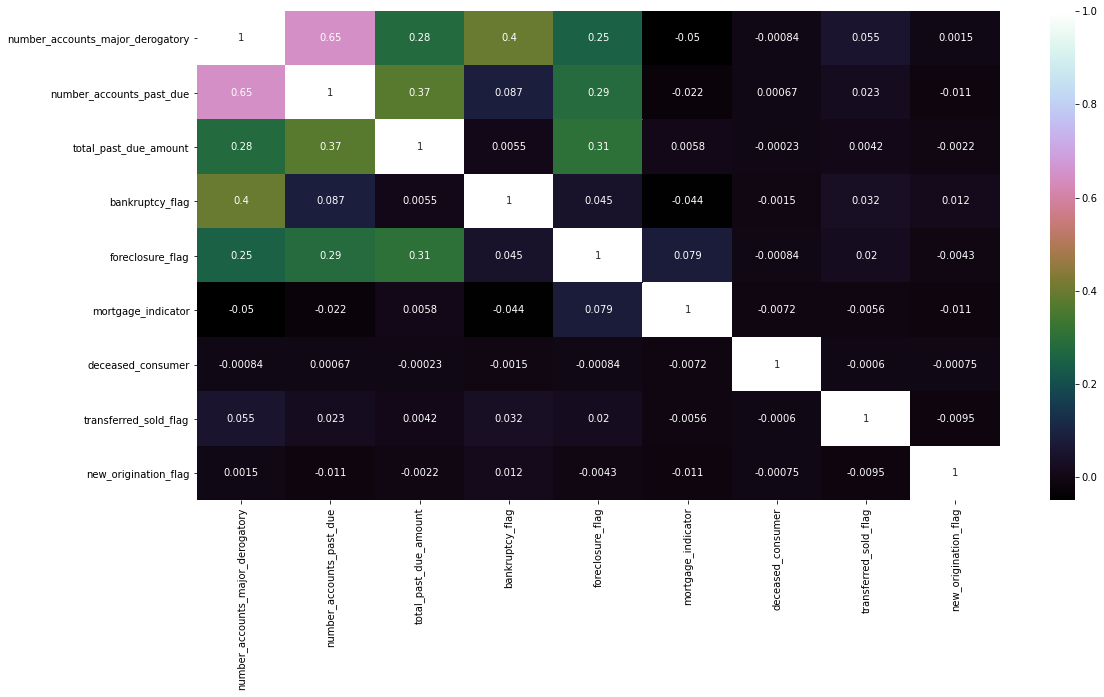

In [155]:
plt.figure(figsize=(18,9))
corr = eq_cust_rsk.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

In [156]:
eq_cust_rsk=eq_cust_rsk.drop(columns=['mortgage_indicator','deceased_consumer','transferred_sold_flag','new_origination_flag'])

#### Check if any variables are highly correlated or non correlated and clean the categorical dataframe

In [157]:
eq_cust_cat=eq_cust_cat.astype('str')

In [158]:
eq_cust_cat.dtypes

consumer_id            object
zip_code               object
state                  object
trade_id               object
product_category       object
portfolio_type         object
ecoa                   object
rate_status            object
payment_frequency      object
account_type           object
activity_designator    object
consumer_age           object
terms                  object
status_category        object
dtype: object

In [159]:
eq_cust_cat.head()

,consumer_id,zip_code,state,trade_id,product_category,portfolio_type,ecoa,rate_status,payment_frequency,account_type,activity_designator,consumer_age,terms,status_category
0,8418583,30577.0,GA,23203394.0,BC,R,I,1,M,18,N,4.0,0.0,1.0
1,5197153,30120.0,GA,69373898.0,BC,R,I,1,M,18,N,4.0,0.0,1.0
2,13467941,90222.0,CA,1543922.0,RT,R,I,2,M,18,C,5.0,0.0,2.0
3,22839444,91786.0,CA,39573415.0,SL2,I,J,1,M,12,N,5.0,0.0,1.0
4,10387251,94122.0,CA,60697783.0,HR,C,I,1,M,89,N,4.0,0.0,1.0


#### Here we are combining risk and financial dataframes

In [160]:
eq_dat=pd.concat([eq_cust_fin,eq_cust_rsk],axis=1)

In [161]:
eq_dat.head()

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,pim_score,monthly_payment,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag
0,1.0,165.0,10.0,1.0,36.0,2.0,1.0,0.0,9999998.0,1.0,...,36.0,30.0,0.0,4.0,1756.0,0.0,0.0,0.0,0.0,0.0
1,3.0,250.0,13.0,0.0,30.0,1.0,0.0,0.0,9999998.0,3.0,...,120.0,0.0,0.0,2.0,13000.0,1.0,1.0,11832.0,0.0,1.0
2,3.0,329.0,22.0,0.0,23.0,8.0,1.0,1.0,1791.0,1.0,...,43.0,94.0,100.0,25.0,3427.0,12.0,16.0,36170.0,0.0,0.0
3,2.0,201.0,3.0,2.0,19.0,0.0,0.0,0.0,9999998.0,2.0,...,48.0,132.0,132.0,0.0,27049.0,0.0,0.0,0.0,0.0,0.0
4,1.0,221.0,8.0,2.0,32.0,0.0,0.0,0.0,9999998.0,7.0,...,68.0,47.0,60.0,0.0,325159.0,0.0,0.0,0.0,0.0,0.0


#### Drop relatively less significant categorical variables

In [162]:
eq_dat=eq_dat[~eq_dat.foreclosure_flag.isin([7])]

#### Remove outliers

In [163]:
eq_dat.total_amount_3rd_party_collections=eq_dat.total_amount_3rd_party_collections.replace(9999998,0)
eq_dat.total_amount_3rd_party_collections=eq_dat.total_amount_3rd_party_collections.replace(9999997,0)
eq_dat.total_amount_3rd_party_collections=eq_dat.total_amount_3rd_party_collections.replace(9999996,0)

In [164]:
df_outlier=eq_dat.describe()
df_outlier

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,pim_score,monthly_payment,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag
count,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,...,106295.000000,106295.000000,106295.000000,106295.000000,1.062950e+05,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000
mean,23.120071,219.304981,15.599078,1.329856,18.973244,9.179472,17.657378,1.270032,555.967967,7.616765,...,42.527071,177.172652,393.339781,2.032269,3.309361e+04,0.641366,0.449918,1344.535924,0.046738,0.015241
std,40.072631,122.185820,21.276301,1.763515,11.321448,26.407792,36.893906,7.684260,2798.989927,20.790316,...,18.499534,928.028897,5557.832854,3.575502,1.156217e+05,1.945069,1.450071,7584.397374,0.211078,0.122509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,131.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,30.000000,0.000000,0.000000,0.000000,1.538000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,198.000000,9.000000,1.000000,17.000000,1.000000,0.000000,0.000000,0.000000,2.000000,...,41.000000,19.000000,40.000000,0.000000,5.713000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,291.000000,20.000000,2.000000,26.000000,2.000000,2.000000,0.000000,0.000000,4.000000,...,51.000000,111.000000,200.000000,3.000000,1.647900e+04,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.000000,753.000000,642.000000,23.000000,72.000000,98.000000,98.000000,97.000000,193133.000000,98.000000,...,190.000000,200070.000000,575724.000000,58.000000,4.311154e+06,29.000000,25.000000,235236.000000,1.000000,1.000000


In [167]:
pd.DataFrame(eq_dat.inquiries_12_months.unique())[0].sort_values(ascending=False).head()

5     99.0
20    97.0
23    30.0
21    25.0
25    24.0
Name: 0, dtype: float64

In [168]:
eq_dat.inquiries_12_months=eq_dat.inquiries_12_months.replace(99,0)
eq_dat.inquiries_12_months=eq_dat.inquiries_12_months.replace(97,0)

In [169]:
pd.DataFrame(eq_dat.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization.unique())[0].sort_values(ascending=False).head()

9     98.0
17    97.0
8     96.0
16    18.0
20    17.0
Name: 0, dtype: float64

In [170]:
eq_dat.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization=eq_dat.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization.replace(98,0)
eq_dat.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization=eq_dat.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization.replace(97,0)
eq_dat.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization=eq_dat.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization.replace(96,0)

In [171]:
pd.DataFrame(eq_dat.bankcard_accts_over_75_percent_utilization.unique())[0].sort_values(ascending=False).head()

3     98.0
7     97.0
4     96.0
10    12.0
13    11.0
Name: 0, dtype: float64

In [172]:
eq_dat.bankcard_accts_over_75_percent_utilization=eq_dat.bankcard_accts_over_75_percent_utilization.replace(98,0)
eq_dat.bankcard_accts_over_75_percent_utilization=eq_dat.bankcard_accts_over_75_percent_utilization.replace(97,0)
eq_dat.bankcard_accts_over_75_percent_utilization=eq_dat.bankcard_accts_over_75_percent_utilization.replace(96,0)

In [173]:
pd.DataFrame(eq_dat.number_3rd_party_collection_accts.unique())[0].sort_values(ascending=False).head()

16    97.0
31    79.0
41    78.0
38    76.0
20    75.0
Name: 0, dtype: float64

In [174]:
eq.number_3rd_party_collection_accts=eq.number_3rd_party_collection_accts.replace(97,0)

In [175]:
pd.DataFrame(eq_dat.number_open_bankcard_accounts.unique())[0].sort_values(ascending=False).head()

12    98.0
14    97.0
21    25.0
8     19.0
20    17.0
Name: 0, dtype: float64

In [176]:
eq_dat.number_open_bankcard_accounts=eq_dat.number_open_bankcard_accounts.replace(98,0)
eq_dat.number_open_bankcard_accounts=eq_dat.number_open_bankcard_accounts.replace(97,0)

In [177]:
pd.DataFrame(eq_dat.number_open_mortgage_accounts.unique())[0].sort_values(ascending=False).head()

5     98.0
9     97.0
3     96.0
8      9.0
11     7.0
Name: 0, dtype: float64

In [178]:
eq_dat.number_open_mortgage_accounts=eq_dat.number_open_mortgage_accounts.replace(98,0)
eq_dat.number_open_mortgage_accounts=eq_dat.number_open_mortgage_accounts.replace(97,0)
eq_dat.number_open_mortgage_accounts=eq_dat.number_open_mortgage_accounts.replace(96,0)

In [179]:
len(eq_dat)

106295

In [180]:
df_outlier_new=eq_dat.describe()
df_outlier_new

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,pim_score,monthly_payment,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag
count,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,...,106295.000000,106295.000000,106295.000000,106295.000000,1.062950e+05,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000
mean,1.571137,219.304981,15.599078,1.329856,18.973244,1.219041,0.532716,1.270032,555.967967,2.747382,...,42.527071,177.172652,393.339781,2.032269,3.309361e+04,0.641366,0.449918,1344.535924,0.046738,0.015241
std,2.152462,122.185820,21.276301,1.763515,11.321448,1.974819,1.122194,7.684260,2798.989927,2.483510,...,18.499534,928.028897,5557.832854,3.575502,1.156217e+05,1.945069,1.450071,7584.397374,0.211078,0.122509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,131.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,30.000000,0.000000,0.000000,0.000000,1.538000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,198.000000,9.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,41.000000,19.000000,40.000000,0.000000,5.713000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,291.000000,20.000000,2.000000,26.000000,2.000000,1.000000,0.000000,0.000000,4.000000,...,51.000000,111.000000,200.000000,3.000000,1.647900e+04,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,753.000000,642.000000,23.000000,72.000000,18.000000,12.000000,97.000000,193133.000000,25.000000,...,190.000000,200070.000000,575724.000000,58.000000,4.311154e+06,29.000000,25.000000,235236.000000,1.000000,1.000000


In [181]:
df_outlier_new.iloc[:,:10]

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts
count,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000
mean,1.571137,219.304981,15.599078,1.329856,18.973244,1.219041,0.532716,1.270032,555.967967,2.747382
std,2.152462,122.185820,21.276301,1.763515,11.321448,1.974819,1.122194,7.684260,2798.989927,2.483510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,131.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,198.000000,9.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2.000000,291.000000,20.000000,2.000000,26.000000,2.000000,1.000000,0.000000,0.000000,4.000000
max,30.000000,753.000000,642.000000,23.000000,72.000000,18.000000,12.000000,97.000000,193133.000000,25.000000


In [182]:
df_outlier_new.iloc[:,10:]

,number_open_mortgage_accounts,pim_score,monthly_payment,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag
count,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000,1.062950e+05,106295.000000,106295.000000,106295.000000,106295.000000,106295.000000
mean,0.622607,42.527071,177.172652,393.339781,2.032269,3.309361e+04,0.641366,0.449918,1344.535924,0.046738,0.015241
std,0.780896,18.499534,928.028897,5557.832854,3.575502,1.156217e+05,1.945069,1.450071,7584.397374,0.211078,0.122509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.000000,0.000000,0.000000,1.538000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,41.000000,19.000000,40.000000,0.000000,5.713000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,111.000000,200.000000,3.000000,1.647900e+04,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,190.000000,200070.000000,575724.000000,58.000000,4.311154e+06,29.000000,25.000000,235236.000000,1.000000,1.000000


In [183]:
col_dtype=pd.DataFrame(eq_dat.dtypes).reset_index().rename(columns={'index':'col',0:'dtype'})
col_dtype.head()

,col,dtype
0,inquiries_12_months,float64
1,age_oldest_account,float64
2,age_newest_account,float64
3,number_accounts_opened_within_12_months,float64
4,number_accounts_always_satisfactory,float64


In [184]:
col_dtype['dtype'].unique()

array([dtype('float64'), dtype('O')], dtype=object)

#### Categorical columns

In [185]:
col_dtype[col_dtype.dtype=='object']

,col,dtype
11,origination_portfolio_type,object
12,origination_product_category,object


#### Numerical columns

In [186]:
col_dtype[col_dtype.dtype=='float64']

,col,dtype
0,inquiries_12_months,float64
1,age_oldest_account,float64
2,age_newest_account,float64
3,number_accounts_opened_within_12_months,float64
4,number_accounts_always_satisfactory,float64
5,number_revolving_accts_greater_than_or_equal_t...,float64
6,bankcard_accts_over_75_percent_utilization,float64
7,number_3rd_party_collection_accts,float64
8,total_amount_3rd_party_collections,float64
9,number_open_bankcard_accounts,float64


In [187]:
col_num_list=list(col_dtype[col_dtype.dtype=='float64']['col'])

In [191]:
col_num_list

['inquiries_12_months',
 'age_oldest_account',
 'age_newest_account',
 'number_accounts_opened_within_12_months',
 'number_accounts_always_satisfactory',
 'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
 'bankcard_accts_over_75_percent_utilization',
 'number_3rd_party_collection_accts',
 'total_amount_3rd_party_collections',
 'number_open_bankcard_accounts',
 'number_open_mortgage_accounts',
 'pim_score',
 'monthly_payment',
 'actual_payment_amount',
 'accounts_non_satisfactory',
 'credit',
 'number_accounts_major_derogatory',
 'number_accounts_past_due',
 'total_past_due_amount',
 'bankruptcy_flag',
 'foreclosure_flag']

In [192]:
eq_dat.head(2)

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,pim_score,monthly_payment,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag
0,1.0,165.0,10.0,1.0,36.0,2.0,1.0,0.0,0.0,1.0,...,36.0,30.0,0.0,4.0,1756.0,0.0,0.0,0.0,0.0,0.0
1,3.0,250.0,13.0,0.0,30.0,1.0,0.0,0.0,0.0,3.0,...,120.0,0.0,0.0,2.0,13000.0,1.0,1.0,11832.0,0.0,1.0


In [193]:
eq_num=eq_dat[col_num_list]

In [194]:
eq_num.head()

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,pim_score,monthly_payment,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag
0,1.0,165.0,10.0,1.0,36.0,2.0,1.0,0.0,0.0,1.0,...,36.0,30.0,0.0,4.0,1756.0,0.0,0.0,0.0,0.0,0.0
1,3.0,250.0,13.0,0.0,30.0,1.0,0.0,0.0,0.0,3.0,...,120.0,0.0,0.0,2.0,13000.0,1.0,1.0,11832.0,0.0,1.0
2,3.0,329.0,22.0,0.0,23.0,8.0,1.0,1.0,1791.0,1.0,...,43.0,94.0,100.0,25.0,3427.0,12.0,16.0,36170.0,0.0,0.0
3,2.0,201.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0,2.0,...,48.0,132.0,132.0,0.0,27049.0,0.0,0.0,0.0,0.0,0.0
4,1.0,221.0,8.0,2.0,32.0,0.0,0.0,0.0,0.0,7.0,...,68.0,47.0,60.0,0.0,325159.0,0.0,0.0,0.0,0.0,0.0


#### Check correlations

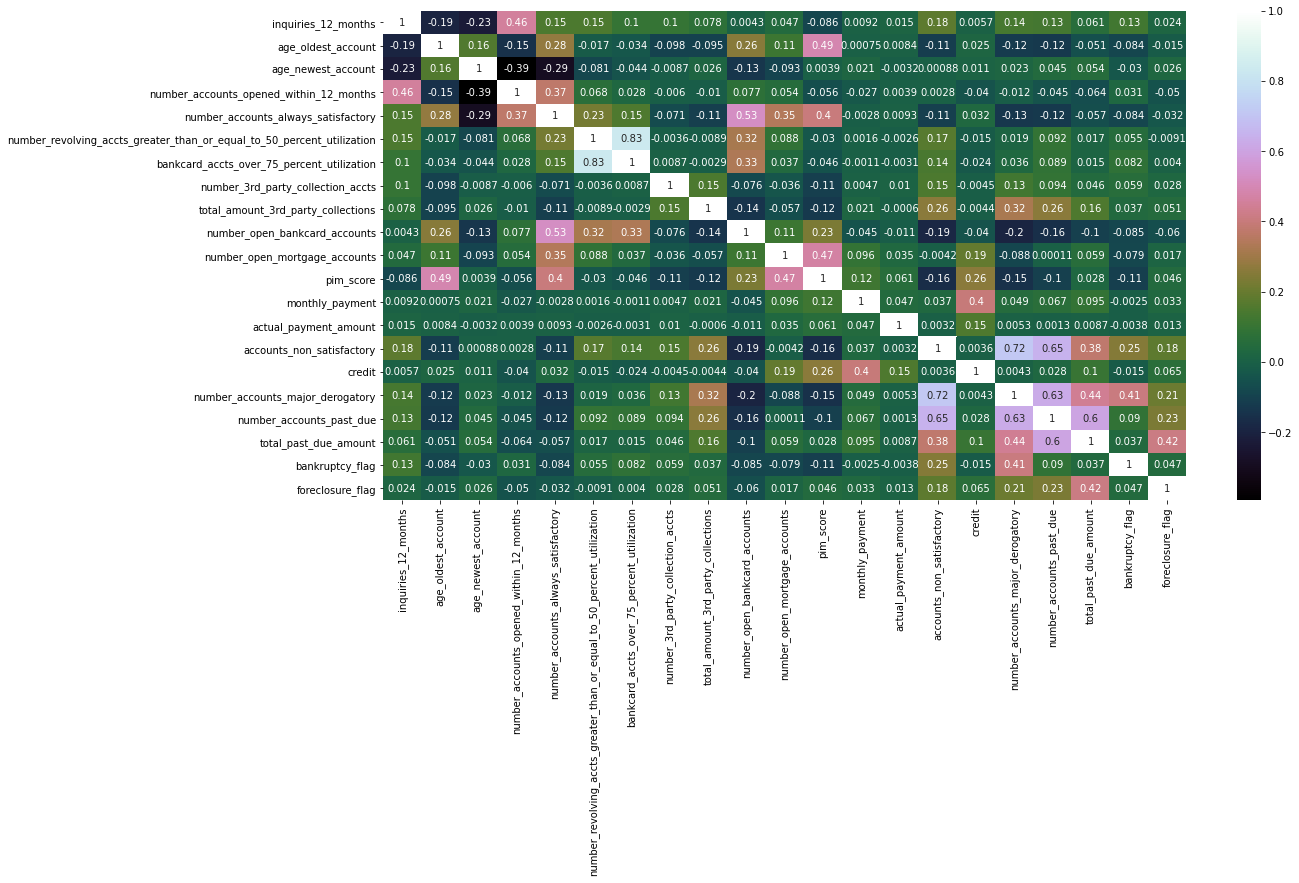

In [195]:
plt.figure(figsize=(18,9))
corr = eq_num.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

#### Do standardization or normilization of data

In [196]:
scaler=StandardScaler()

In [197]:
list_x=list(eq_num.drop(columns=['foreclosure_flag','bankruptcy_flag']).columns)

In [198]:
X=eq_num[list_x].values

In [199]:
len(X)

106295

In [200]:
scaler.fit(X)

StandardScaler()

In [201]:
scaler.transform(X)

array([[-0.26534251, -0.44444795, -0.26316155, ..., -0.32974096,
        -0.31027424, -0.1772774 ],
       [ 0.66383051,  0.25121706, -0.12215893, ...,  0.18438195,
         0.37935023,  1.38277478],
       [ 0.66383051,  0.89777631,  0.30084891, ...,  5.83973405,
        10.72371729,  4.59174621],
       ...,
       [ 0.199244  , -0.6572396 , -0.31016242, ..., -0.32974096,
        -0.31027424, -0.1772774 ],
       [ 2.98676306, -1.54114338, -0.31016242, ..., -0.32974096,
        -0.31027424, -0.1772774 ],
       [-0.72992902, -0.70634536, -0.59216765, ..., -0.32974096,
        -0.31027424, -0.1772774 ]])

In [ ]:
#Clustering

In [202]:
rg=range(1,10)

In [203]:
kmeans = [KMeans(n_clusters=i) for i in rg]
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [204]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-1431302281652403.0,
 -541278099814479.94,
 -322382151810290.8,
 -186247036107580.75,
 -123817245540910.47,
 -89092210850176.44,
 -70957234763139.81,
 -56127593876294.41,
 -45037082284917.78]

In [205]:
score=score/np.mean(score)

In [206]:
score

array([4.49429089, 1.69961389, 1.01228035, 0.58481592, 0.3887863 ,
       0.27974965, 0.2228058 , 0.17624071, 0.14141649])

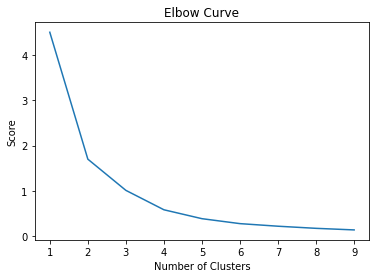

In [207]:
plt.plot(rg,score)
plt.ylim()
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [208]:
kmeans=KMeans(n_clusters=2)
km=kmeans.fit(X)
km

KMeans(n_clusters=2)

In [209]:
df_clust=pd.DataFrame(km.labels_,columns=['cluster_flag'])

In [210]:
df_clust.head(2)

,cluster_flag
0,0
1,0


In [211]:
len(df_clust)

106295

In [212]:
len(eq_num[list_x].values)

106295

In [213]:
eq_new=pd.concat([eq_num,df_clust],axis=1)

In [214]:
eq_new[['pim_score','cluster_flag','foreclosure_flag','bankruptcy_flag']].head(5)

,pim_score,cluster_flag,foreclosure_flag,bankruptcy_flag
0,36.0,0.0,0.0,0.0
1,120.0,0.0,1.0,0.0
2,43.0,0.0,0.0,0.0
3,48.0,0.0,0.0,0.0
4,68.0,1.0,0.0,0.0


In [215]:
km.cluster_centers_

array([[1.56691441e+00, 2.19060398e+02, 1.56072152e+01, 1.33774552e+00,
        1.89155903e+01, 1.22266689e+00, 5.36536207e-01, 1.27143674e+00,
        5.57090524e+02, 2.76036590e+00, 6.00819775e-01, 4.18384868e+01,
        1.23920794e+02, 2.57001967e+02, 2.02863400e+00, 1.72455093e+04,
        6.38940300e-01, 4.43860890e-01, 1.22979579e+03],
       [1.71188630e+00, 2.27457687e+02, 1.53278424e+01, 1.06686047e+00,
        2.08950258e+01, 1.09819121e+00, 4.05361757e-01, 1.22319121e+00,
        5.18549742e+02, 2.31459948e+00, 1.34883721e+00, 6.54796512e+01,
        1.95221738e+03, 4.93788953e+03, 2.15342377e+00, 5.61358588e+05,
        7.22222222e-01, 6.51808786e-01, 5.16916990e+03]])

In [216]:
len(eq_new[eq_new.cluster_flag==1])

3097

In [217]:
eq_new=eq_new.dropna()

In [218]:
eq_new.cluster_flag=eq_new.cluster_flag.apply(lambda x : int(x))
eq_new.foreclosure_flag=eq_new.foreclosure_flag.apply(lambda x : int(x))
eq_new.bankruptcy_flag=eq_new.bankruptcy_flag.apply(lambda x : int(x))

In [219]:
eq_new[['pim_score','cluster_flag','foreclosure_flag','bankruptcy_flag']].head(5)

,pim_score,cluster_flag,foreclosure_flag,bankruptcy_flag
0,36.0,0,0,0
1,120.0,0,1,0
2,43.0,0,0,0
3,48.0,0,0,0
4,68.0,1,0,0


In [220]:
eq_new.bankruptcy_flag=eq_new.bankruptcy_flag*3
eq_new.foreclosure_flag=eq_new.foreclosure_flag*2

In [221]:
eq_new['level']=eq_new.bankruptcy_flag+eq_new.foreclosure_flag+eq_new.cluster_flag

In [222]:
eq_new.level.unique()

array([0, 2, 1, 3, 5, 4, 6], dtype=int64)

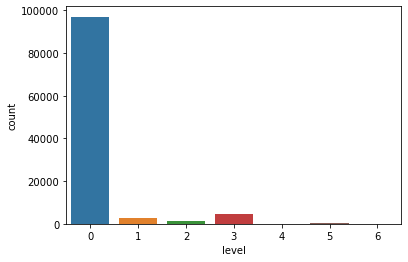

In [223]:
sns.countplot(x=eq_new.level)

#### Let us combine few risk levels to form simplified ones

In [224]:
eq_new['risk_level']=eq_new.level

In [225]:
eq_new.risk_level=eq_new.risk_level.astype(str)

In [226]:
eq_new.risk_level.dtypes

dtype('O')

In [227]:
eq_new.risk_level=eq_new.risk_level.replace('0','good')
eq_new.risk_level=eq_new.risk_level.replace('1','average')
eq_new.risk_level=eq_new.risk_level.replace('2','bad')
eq_new.risk_level=eq_new.risk_level.replace('3','bad')
eq_new.risk_level=eq_new.risk_level.replace('4','bad')
eq_new.risk_level=eq_new.risk_level.replace('5','critical')
eq_new.risk_level=eq_new.risk_level.replace('6','critical')

In [228]:
eq_new.risk_level.head()

0       good
1        bad
2       good
3       good
4    average
Name: risk_level, dtype: object

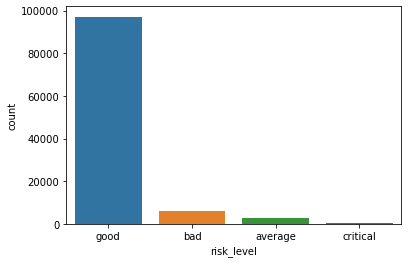

In [229]:
sns.countplot(x=eq_new.risk_level)

In [230]:
eq_new=eq_new.drop(columns=['level'])

In [232]:
eq_new.head()

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag,cluster_flag,risk_level
0,1.0,165.0,10.0,1.0,36.0,2.0,1.0,0.0,0.0,1.0,...,0.0,4.0,1756.0,0.0,0.0,0.0,0,0,0,good
1,3.0,250.0,13.0,0.0,30.0,1.0,0.0,0.0,0.0,3.0,...,0.0,2.0,13000.0,1.0,1.0,11832.0,0,2,0,bad
2,3.0,329.0,22.0,0.0,23.0,8.0,1.0,1.0,1791.0,1.0,...,100.0,25.0,3427.0,12.0,16.0,36170.0,0,0,0,good
3,2.0,201.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0,2.0,...,132.0,0.0,27049.0,0.0,0.0,0.0,0,0,0,good
4,1.0,221.0,8.0,2.0,32.0,0.0,0.0,0.0,0.0,7.0,...,60.0,0.0,325159.0,0.0,0.0,0.0,0,0,1,average


**Notes**
- From the above we have divided the customers into four levels

In [233]:
clf = DecisionTreeClassifier(random_state=100,max_depth=5)

In [234]:
X=eq_new.drop(columns=['risk_level','cluster_flag','bankruptcy_flag','foreclosure_flag']).values

In [235]:
y=eq_new.risk_level.values

In [236]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [237]:
clf_mod = clf.fit(X_train, y_train)

In [238]:
y_pred = clf_mod.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       0.65      0.68      0.66       687
         bad       0.82      0.31      0.45      1544
    critical       0.00      0.00      0.00        58
        good       0.95      0.99      0.97     24285

    accuracy                           0.94     26574
   macro avg       0.60      0.49      0.52     26574
weighted avg       0.93      0.94      0.93     26574



In [239]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  467     9     0   211]
 [   36   481     0  1027]
 [    0    20     0    38]
 [  220    79     0 23986]]
0.9382855422593512


In [240]:
features = list(eq_new.drop(columns=['risk_level','cluster_flag','bankruptcy_flag','foreclosure_flag']).columns)
features

['inquiries_12_months',
 'age_oldest_account',
 'age_newest_account',
 'number_accounts_opened_within_12_months',
 'number_accounts_always_satisfactory',
 'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
 'bankcard_accts_over_75_percent_utilization',
 'number_3rd_party_collection_accts',
 'total_amount_3rd_party_collections',
 'number_open_bankcard_accounts',
 'number_open_mortgage_accounts',
 'pim_score',
 'monthly_payment',
 'actual_payment_amount',
 'accounts_non_satisfactory',
 'credit',
 'number_accounts_major_derogatory',
 'number_accounts_past_due',
 'total_past_due_amount']

In [242]:
from io import StringIO

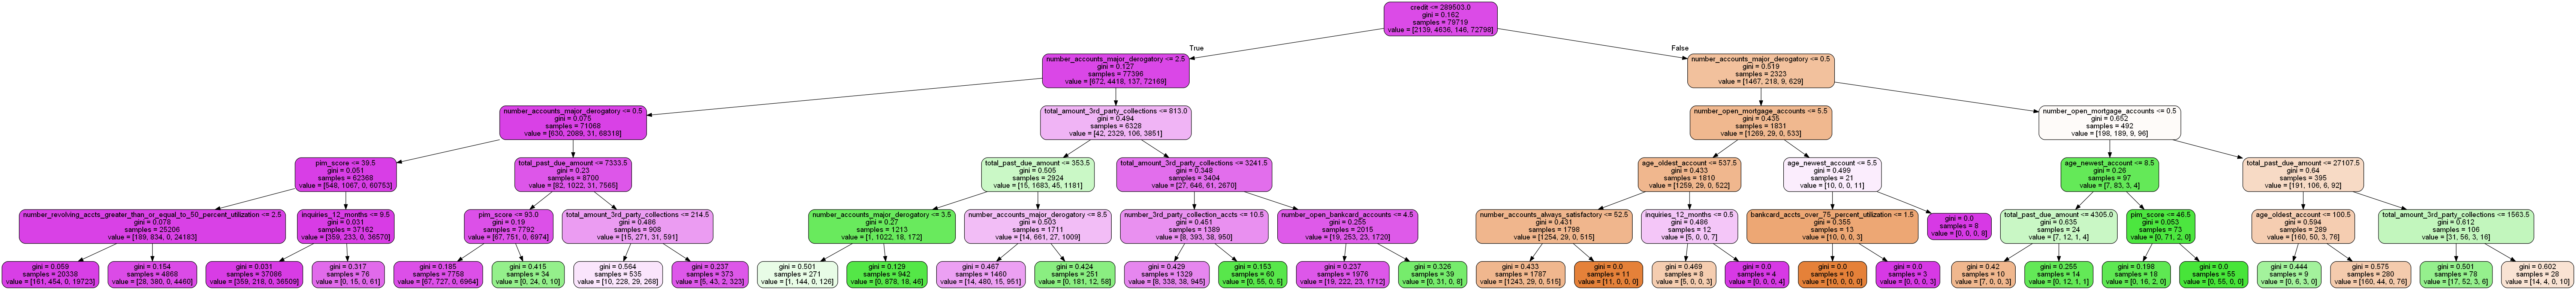

In [246]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [247]:
# specify number of folds for k-fold CV 
n_folds = 5 

# max_depth tuning
parameters = parameters = {'max_depth': range(1, 10)} 

# instantiate the model 
dtree = DecisionTreeClassifier(criterion = "gini", random_state =100) 

# fit tree on training data 
tree = GridSearchCV(dtree, parameters, cv=n_folds,scoring="accuracy") 
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, scoring='accuracy')

In [248]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.110111,0.004208,0.013575,0.000487,1,{'max_depth': 1},0.922541,0.923608,0.923984,0.923419,0.924857,0.923682,0.000755,8
1,0.150201,0.002408,0.012980,0.000021,2,{'max_depth': 2},0.922541,0.923608,0.923984,0.922667,0.924857,0.923531,0.000860,9
2,0.190689,0.001317,0.013372,0.000483,3,{'max_depth': 3},0.927434,0.930632,0.931949,0.931698,0.932760,0.930895,0.001859,7
3,0.230392,0.002284,0.013756,0.000396,4,{'max_depth': 4},0.932577,0.935524,0.937343,0.934897,0.936587,0.935386,0.001638,6
4,0.289226,0.030439,0.013962,0.000630,5,{'max_depth': 5},0.934772,0.939288,0.938848,0.936402,0.938029,0.937468,0.001670,5


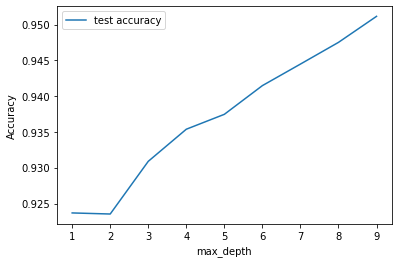

In [250]:
# plotting accuracies with max_depth
plt.figure()
#plt.plot(scores["param_max_depth"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [251]:
# specify number of folds for k-fold CV
n_folds = 5

# min samples leaf
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [252]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.676606,0.026021,0.015372,0.000479,5,{'min_samples_leaf': 5},0.962556,0.963623,0.965692,0.963874,0.964749,0.964099,0.001060,1
1,0.615387,0.024637,0.015162,0.000398,25,{'min_samples_leaf': 25},0.951079,0.954528,0.952521,0.951643,0.954525,0.952859,0.001437,2
2,0.586447,0.020482,0.015175,0.000408,45,{'min_samples_leaf': 45},0.945497,0.949385,0.949824,0.945309,0.948818,0.947767,0.001957,3
3,0.568487,0.015161,0.014982,0.000619,65,{'min_samples_leaf': 65},0.942925,0.945622,0.943615,0.942423,0.944302,0.943778,0.001119,4
4,0.554326,0.021463,0.014980,0.000616,85,{'min_samples_leaf': 85},0.939099,0.944180,0.941357,0.940793,0.942044,0.941495,0.001659,5


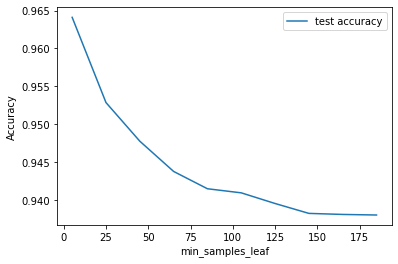

In [253]:
# plotting accuracies with min_samples_leaf
plt.figure()
#plt.plot(scores["param_min_samples_leaf"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [254]:
# specify number of folds for k-fold CV
n_folds = 5

# min samples split
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [255]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.699533,0.019551,0.016148,0.000402,5,{'min_samples_split': 5},0.959358,0.961678,0.960424,0.958981,0.961300,0.960348,0.001052,1
1,0.694344,0.025588,0.015566,0.001193,25,{'min_samples_split': 25},0.957852,0.961741,0.959358,0.958668,0.962930,0.960110,0.001916,2
2,0.696951,0.053491,0.015950,0.000640,45,{'min_samples_split': 45},0.952333,0.959609,0.956535,0.956034,0.958163,0.956535,0.002450,3
3,0.679594,0.023804,0.015558,0.000488,65,{'min_samples_split': 65},0.950201,0.955845,0.953337,0.952584,0.953710,0.953135,0.001824,4
4,0.672586,0.021241,0.015168,0.000395,85,{'min_samples_split': 85},0.948507,0.952396,0.951518,0.950640,0.951327,0.950877,0.001311,5


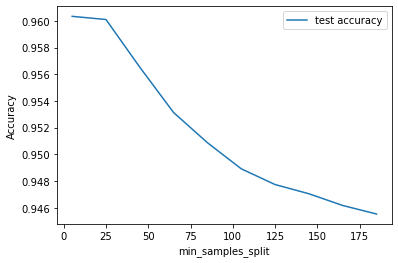

In [257]:
# plotting accuracies with min_samples_leaf
plt.figure()
#plt.plot(scores["param_min_samples_split"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [258]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(40,120,40),
    'min_samples_split': range(30, 90, 30),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   29.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(40, 120, 40),
                         'min_samples_split': range(30, 90, 30)},
             verbose=1)

In [259]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.284830,0.006766,0.013763,3.989458e-04,entropy,5,40,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.933141,0.935524,0.937469,0.935085,0.935646,0.935373,0.001382,13
1,0.282843,0.003064,0.013963,2.132481e-07,entropy,5,40,60,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.933141,0.935524,0.937469,0.935085,0.935646,0.935373,0.001382,13
2,0.278854,0.001850,0.013962,3.371748e-07,entropy,5,80,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.932765,0.934521,0.936841,0.934584,0.935269,0.934796,0.001316,15
3,0.281048,0.004343,0.014361,4.883831e-04,entropy,5,80,60,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.932765,0.934521,0.936841,0.934584,0.935269,0.934796,0.001316,15
4,0.446236,0.002465,0.014766,3.932707e-04,entropy,10,40,30,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.940981,0.942988,0.946312,0.943866,0.945431,0.943916,0.001872,3
5,0.446401,0.001488,0.014371,4.802985e-04,entropy,10,40,60,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.940981,0.942988,0.946312,0.943866,0.945431,0.943916,0.001872,3
6,0.437254,0.001007,0.014952,6.334939e-06,entropy,10,80,30,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.937280,0.940228,0.939852,0.939037,0.941793,0.939638,0.001480,7
7,0.438228,0.002570,0.014360,4.899701e-04,entropy,10,80,60,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.937280,0.940228,0.939852,0.939037,0.941793,0.939638,0.001480,7
8,0.264095,0.001726,0.013963,3.732146e-06,gini,5,40,30,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.934333,0.937908,0.938535,0.936277,0.938029,0.937016,0.001541,9
9,0.265295,0.003731,0.014158,4.017963e-04,gini,5,40,60,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.934333,0.937908,0.938535,0.936277,0.938029,0.937016,0.001541,9


In [260]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9462737989159133
DecisionTreeClassifier(max_depth=10, min_samples_leaf=40, min_samples_split=30)


In [261]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=25)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=25,
                       random_state=100)

In [262]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9378716038232859

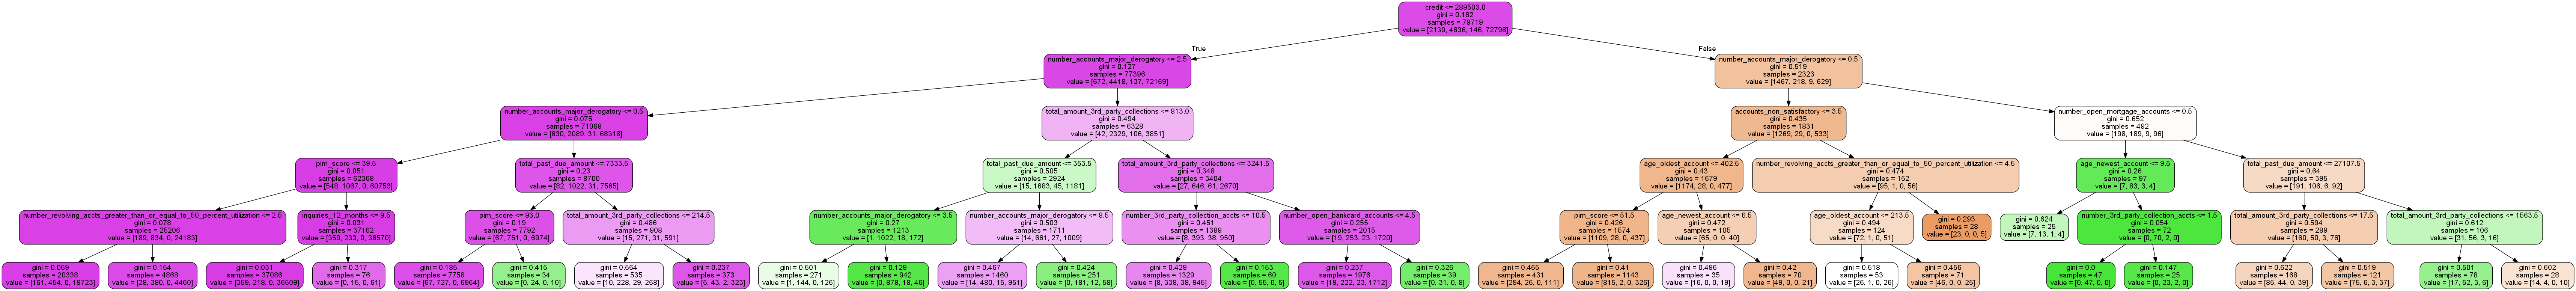

In [263]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [264]:
# classification metrics
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     average       0.64      0.66      0.65       687
         bad       0.81      0.31      0.45      1544
    critical       0.00      0.00      0.00        58
        good       0.95      0.99      0.97     24285

    accuracy                           0.94     26574
   macro avg       0.60      0.49      0.52     26574
weighted avg       0.93      0.94      0.93     26574



In [265]:
len(clf_gini.feature_importances_)

19

In [266]:
len(eq_new.drop(columns=['risk_level','cluster_flag','bankruptcy_flag','foreclosure_flag']).columns)

19

In [267]:
weights=clf_gini.feature_importances_
weights

array([1.09774210e-03, 6.52080655e-04, 1.75796151e-03, 0.00000000e+00,
       0.00000000e+00, 5.40191191e-03, 0.00000000e+00, 9.96396832e-03,
       1.18286286e-01, 7.16214542e-03, 8.89805562e-03, 9.66736935e-03,
       0.00000000e+00, 0.00000000e+00, 3.67595762e-04, 3.86707909e-01,
       3.69408096e-01, 0.00000000e+00, 8.06288791e-02])

In [268]:
eq_new_drop=eq_new.drop(columns=['risk_level','cluster_flag','bankruptcy_flag','foreclosure_flag']).columns
eq_new_drop

Index(['inquiries_12_months', 'age_oldest_account', 'age_newest_account',
       'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'pim_score', 'monthly_payment',
       'actual_payment_amount', 'accounts_non_satisfactory', 'credit',
       'number_accounts_major_derogatory', 'number_accounts_past_due',
       'total_past_due_amount'],
      dtype='object')

In [269]:
df_weights=pd.DataFrame(eq_new_drop,weights).reset_index()

In [270]:
df_weights=df_weights.rename(columns={'index':'weight',0:'variable'})

In [271]:
df_weights

,weight,variable
0,0.001098,inquiries_12_months
1,0.000652,age_oldest_account
2,0.001758,age_newest_account
3,0.000000,number_accounts_opened_within_12_months
4,0.000000,number_accounts_always_satisfactory
5,0.005402,number_revolving_accts_greater_than_or_equal_t...
6,0.000000,bankcard_accts_over_75_percent_utilization
7,0.009964,number_3rd_party_collection_accts
8,0.118286,total_amount_3rd_party_collections
9,0.007162,number_open_bankcard_accounts


In [272]:
df_weights=df_weights[~df_weights.weight.isin([0])].reset_index(drop=True)

In [273]:
df_weights

,weight,variable
0,0.001098,inquiries_12_months
1,0.000652,age_oldest_account
2,0.001758,age_newest_account
3,0.005402,number_revolving_accts_greater_than_or_equal_t...
4,0.009964,number_3rd_party_collection_accts
5,0.118286,total_amount_3rd_party_collections
6,0.007162,number_open_bankcard_accounts
7,0.008898,number_open_mortgage_accounts
8,0.009667,pim_score
9,0.000368,accounts_non_satisfactory


In [276]:
df_weights['variable'].values

array(['inquiries_12_months', 'age_oldest_account', 'age_newest_account',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections',
       'number_open_bankcard_accounts', 'number_open_mortgage_accounts',
       'pim_score', 'accounts_non_satisfactory', 'credit',
       'number_accounts_major_derogatory', 'total_past_due_amount'],
      dtype=object)

In [277]:
eq_num.head(2)

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,pim_score,monthly_payment,actual_payment_amount,accounts_non_satisfactory,credit,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag
0,1.0,165.0,10.0,1.0,36.0,2.0,1.0,0.0,0.0,1.0,...,36.0,30.0,0.0,4.0,1756.0,0.0,0.0,0.0,0.0,0.0
1,3.0,250.0,13.0,0.0,30.0,1.0,0.0,0.0,0.0,3.0,...,120.0,0.0,0.0,2.0,13000.0,1.0,1.0,11832.0,0.0,1.0


Positive
   ##### inquiries_12_months, age_oldest_account, age_newest_account, number_open_bankcard_accounts
   ##### number_revolving_accts_greater_than_or_equal_to_50_percent_utilization, number_open_mortgage_accounts, 
   ##### pim_score, credit
Negative    
   ##### number_3rd_party_collection_accts, total_amount_3rd_party_collections, 
   ##### accounts_non_satisfactory, number_accounts_major_derogatory, total_past_due_amount

In [274]:
eq_new_df=eq_num[df_weights['variable'].values]

In [275]:
eq_new_df

,inquiries_12_months,age_oldest_account,age_newest_account,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,number_open_mortgage_accounts,pim_score,accounts_non_satisfactory,credit,number_accounts_major_derogatory,total_past_due_amount
0,1.0,165.0,10.0,2.0,0.0,0.0,1.0,3.0,36.0,4.0,1756.0,0.0,0.0
1,3.0,250.0,13.0,1.0,0.0,0.0,3.0,0.0,120.0,2.0,13000.0,1.0,11832.0
2,3.0,329.0,22.0,8.0,1.0,1791.0,1.0,1.0,43.0,25.0,3427.0,12.0,36170.0
3,2.0,201.0,3.0,0.0,0.0,0.0,2.0,0.0,48.0,0.0,27049.0,0.0,0.0
4,1.0,221.0,8.0,0.0,0.0,0.0,7.0,1.0,68.0,0.0,325159.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106292,1.0,145.0,9.0,2.0,0.0,0.0,4.0,0.0,38.0,1.0,5001.0,0.0,0.0
106293,2.0,397.0,11.0,0.0,0.0,0.0,0.0,4.0,49.0,3.0,1300.0,0.0,2414.0
106294,2.0,139.0,9.0,1.0,0.0,0.0,5.0,1.0,52.0,0.0,3815.0,0.0,0.0
106295,8.0,31.0,9.0,6.0,0.0,0.0,5.0,0.0,17.0,1.0,12983.0,0.0,0.0


In [278]:
eq_new_df['score']=0

In [279]:
df_weights['variable'].values

array(['inquiries_12_months', 'age_oldest_account', 'age_newest_account',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections',
       'number_open_bankcard_accounts', 'number_open_mortgage_accounts',
       'pim_score', 'accounts_non_satisfactory', 'credit',
       'number_accounts_major_derogatory', 'total_past_due_amount'],
      dtype=object)

In [280]:
#eq_new_df.score=df_weights.weight[0]*eq_new_df.inquiries_12_months+df_weights.weight[1]*eq_new_df.age_oldest_account+df_weights.weight[2]*eq_new_df.age_newest_account+df_weights.weight[3]*eq_new_df.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization-df_weights.weight[4]*eq_new_df.number_3rd_party_collection_accts-df_weights.weight[5]*eq_new_df.total_amount_3rd_party_collections+df_weights.weight[6]*eq_new_df.number_open_bankcard_accounts+df_weights.weight[7]*eq_new_df.number_open_mortgage_accounts+df_weights.weight[8]*eq_new_df.pim_score-df_weights.weight[9]*eq_new_df.accounts_non_satisfactory+df_weights.weight[10]*eq_new_df.credit-df_weights.weight[11]*eq_new_df.number_accounts_major_derogatory-df_weights.weight[12]*eq_new_df.total_past_due_amount
eq_new_df.score=df_weights.weight[0]*eq_new_df.inquiries_12_months+df_weights.weight[1]*eq_new_df.age_oldest_account+df_weights.weight[2]*eq_new_df.age_newest_account+df_weights.weight[3]*eq_new_df.number_revolving_accts_greater_than_or_equal_to_50_percent_utilization+df_weights.weight[4]*eq_new_df.number_3rd_party_collection_accts+df_weights.weight[5]*eq_new_df.total_amount_3rd_party_collections+df_weights.weight[6]*eq_new_df.number_open_bankcard_accounts+df_weights.weight[7]*eq_new_df.number_open_mortgage_accounts+df_weights.weight[8]*eq_new_df.pim_score+df_weights.weight[9]*eq_new_df.accounts_non_satisfactory+df_weights.weight[10]*eq_new_df.credit+df_weights.weight[11]*eq_new_df.number_accounts_major_derogatory+df_weights.weight[12]*eq_new_df.total_past_due_amount

In [281]:
eq_new_df.score.head()

0       679.579515
1      5982.950000
2      4458.628826
3     10460.679131
4    125742.432722
Name: score, dtype: float64

In [282]:
df_score=pd.concat([eq_new,pd.DataFrame(eq_new_df.score,columns=['score']),eq[['vantage_score_3','origination_vantage_score3']]],axis=1)

In [283]:
print(max(df_score.score))
print(min(df_score.score))

1667158.8759127343
0.1753190093816526


In [284]:
df_score=df_score.dropna()

In [285]:
df_score.score=df_score.score.round(0)
df_score.score=df_score.score.astype('int')

In [286]:
df_score_plot=pd.DataFrame(df_score.score.sort_values(ascending=False).reset_index(drop=True),columns=['score'])

In [287]:
df_score_plot.head()

,score
0,1667159
1,1663312
2,1661380
3,1546833
4,1546833


In [288]:
df_score_plot.describe()

,score
count,1.062930e+05
mean,1.297278e+04
std,4.477942e+04
min,0.000000e+00
25%,7.660000e+02
50%,2.381000e+03
75%,6.574000e+03
max,1.667159e+06


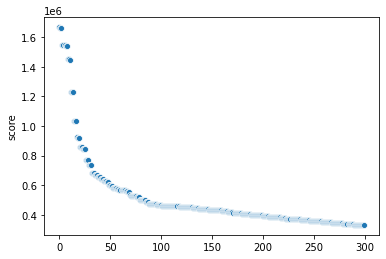

In [289]:
sns.scatterplot(x=df_score_plot[:300].index,y=df_score_plot.score[:300])

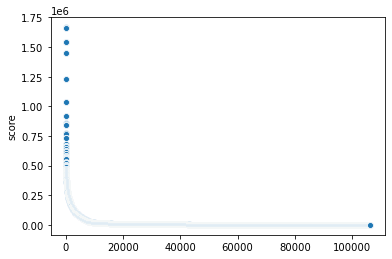

In [290]:
sns.scatterplot(x=df_score_plot.index,y=df_score_plot.score)

In [291]:
df_score_plot.score=100*np.log10(df_score_plot.score)

In [294]:
df_score.score=100*np.log10(df_score.score+10)

In [295]:
print(max(df_score.score))
print(min(df_score.score))

280.0853091911503
204.1392685158225


In [296]:
#df_score.score=df_score.score*100

In [297]:
#df_score.score=(df_score.score+200).round(0)

In [298]:
df_score=df_score.dropna()

In [299]:
df_score.score=df_score.score.astype('float64')

In [300]:
df_score.score.head()

0    246.817729
1    258.856797
2    257.405563
3    261.489597
4    271.596283
Name: score, dtype: float64

In [305]:
df_score.head(3)

,inquiries_12_months,age_oldest_account,age_newest_account,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,number_3rd_party_collection_accts,total_amount_3rd_party_collections,number_open_bankcard_accounts,...,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,bankruptcy_flag,foreclosure_flag,cluster_flag,risk_level,score,vantage_score_3,origination_vantage_score3
0,1.0,165.0,10.0,1.0,36.0,2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,good,427,664.0,689.0
1,3.0,250.0,13.0,0.0,30.0,1.0,0.0,0.0,0.0,3.0,...,1.0,1.0,11832.0,0.0,2.0,0.0,bad,839,584.0,762.0
2,3.0,329.0,22.0,0.0,23.0,8.0,1.0,1.0,1791.0,1.0,...,12.0,16.0,36170.0,0.0,0.0,0.0,good,472,479.0,631.0


In [301]:
df_score.score=df_score.score+df_score.pim_score*5-10*df_score.bankruptcy_flag-10*df_score.foreclosure_flag-10*df_score.cluster_flag

In [302]:
df_score.score=df_score.score.round(0)
df_score.score=df_score.score.astype('int')

In [303]:
df_score[['score','vantage_score_3','origination_vantage_score3']].head()

,score,vantage_score_3,origination_vantage_score3
0,427,664.0,689.0
1,839,584.0,762.0
2,472,479.0,631.0
3,501,748.0,720.0
4,602,805.0,830.0


In [304]:
print(max(df_score.score))
print(min(df_score.score))

1218
225


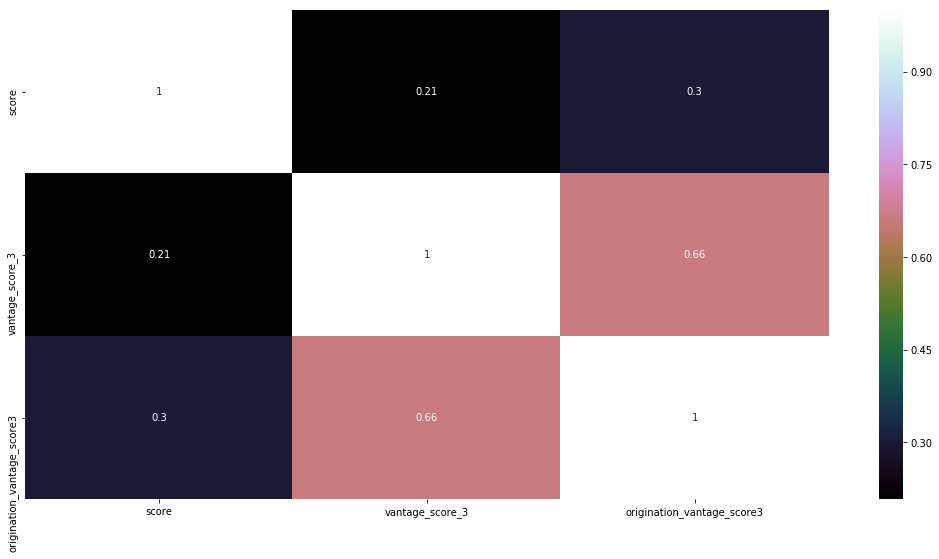

In [146]:
plt.figure(figsize=(18,9))
corr = df_score[['score','vantage_score_3','origination_vantage_score3']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()